# Pantheon+ Likelihood Implementation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
import numpy as np
from desilike.likelihoods.supernovae import PantheonPlusSHOESSNLikelihood,PantheonPlusSNLikelihood,PantheonSNLikelihood

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo(engine='camb')

## Set priors
cosmo.init.params = {'Omega_m': {'prior': {'limits': [0.1, 0.9]},
                          'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.002},
                          'latex': '\Omega_m'},
                     'H0': {'prior': {'limits': [20, 100]},
                          'ref': {'dist': 'norm', 'loc': 67, 'scale': 0.5},
                          'latex': 'H_0'}
                     }

## Sampling

In [9]:
from desilike import setup_logging
from desilike.samplers import EmceeSampler

setup_logging()  # set up logging

likelihoods=[PantheonSNLikelihood(cosmo=cosmo),PantheonPlusSNLikelihood(cosmo=cosmo),PantheonPlusSHOESSNLikelihood(cosmo=cosmo)]
labels=['Pantheon','Pantheon+','Pantheon+ & SH0ES']
chains={}

for name,likelihood in zip(labels,likelihoods):
    likelihood.runtime_info.pipeline.calculators
    sampler = EmceeSampler(likelihood, save_fn=f'_tests/chain_{name}_*.npy', seed=42)
    sampler.run(check={'max_eigen_gr': 0.05, 'stable_over': 1})
    chains[name] = sampler.chains[0].remove_burnin(0.5)[::10]
    print(f'\n {name}: \n',chains[name].to_stats(tablefmt='pretty'))

Loading covariance from /home/users/rcalderonb/.local/data/PantheonPlusSNLikelihood/Pantheon+SH0ES_STAT+SYS.cov
Done
[000025.75] [0/1] 11-30 15:31  EmceeSampler              INFO     Varied parameters: ['Omega_m', 'H0', 'Mb'].
[000097.87] [0/1] 11-30 15:32  Chain                     INFO     Saving _tests/chain_Pantheon+ & SH0ES_0.npy.
[000097.88] [0/1] 11-30 15:32  EmceeSampler              INFO     Diagnostics:
[000097.91] [0/1] 11-30 15:32  EmceeSampler              INFO     - max eigen Gelman-Rubin - 1 is 1.31; not < 0.05.
[000097.93] [0/1] 11-30 15:32  EmceeSampler              INFO     - max diag Gelman-Rubin - 1 is 0.455.
[000098.20] [0/1] 11-30 15:32  EmceeSampler              INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.25.
[000098.21] [0/1] 11-30 15:32  EmceeSampler              INFO     - max Geweke is 1.13.
[000098.21] [0/1] 11-30 15:32  EmceeSampler              INFO     - Geweke p-value is 0.129.
[000098.23] [0/1] 11-30 15:32  EmceeSampler              INFO    

/home/users/rcalderonb/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[000165.15] [0/1] 11-30 15:33  Chain                     INFO     Saving _tests/chain_Pantheon+ & SH0ES_0.npy.
[000165.16] [0/1] 11-30 15:33  EmceeSampler              INFO     Diagnostics:
[000165.17] [0/1] 11-30 15:33  EmceeSampler              INFO     - max eigen Gelman-Rubin - 1 is 0.531; not < 0.05.
[000165.18] [0/1] 11-30 15:33  EmceeSampler              INFO     - max diag Gelman-Rubin - 1 is 0.0648.
[000165.68] [0/1] 11-30 15:33  EmceeSampler              INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.346.
[000165.69] [0/1] 11-30 15:33  EmceeSampler              INFO     - max Geweke is 0.417.
[000165.69] [0/1] 11-30 15:33  EmceeSampler              INFO     - Geweke p-value is 0.0943.
[000165.70] [0/1] 11-30 15:33  EmceeSampler              INFO     - (300 iterations / integrated autocorrelation time) is 16.1.
[000165.70] [0/1] 11-30 15:33  EmceeSampler              INFO     - max variation of integrated autocorrelation time is 0.337.
[000241.12] [0/1] 11-30 15:34  C

In [ ]:
# for likelihood in likelihoods:
#     likelihood.plot()

## Plotting

Let's load the precomputed chains (previous section)

In [3]:
from desilike.samples import Chain

labels=['Pantheon','Pantheon+','Pantheon+ & SH0ES']
chains = {label: Chain.load(f'_tests/chain_{label}_0.npy').remove_burnin(0.35)[::10] for label in labels}

Removed no burn in
Removed no burn in
Removed no burn in


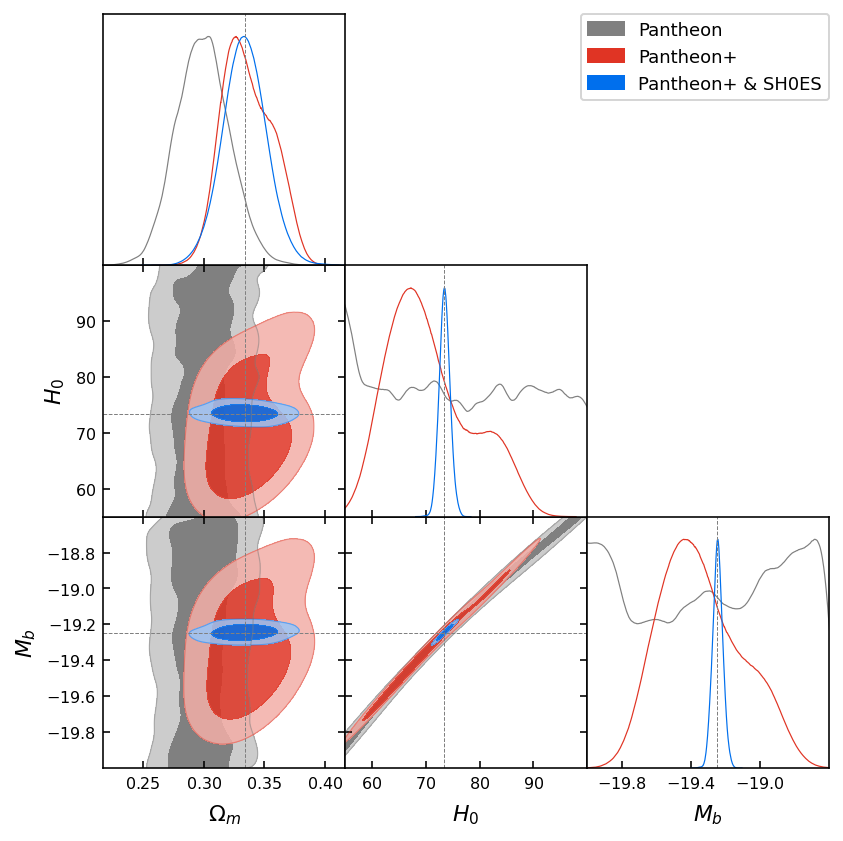

In [9]:
from desilike.samples import plotting

plotting.plot_triangle(list(chains.values()), labels=labels,filled=True, param_limits={'H0':[55,100],'Mb':[-20,-18.6]},markers={'Mb': -19.25,'H0':73.3,'Omega_m':0.334},show=True)
